In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import pandas as pd 

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

In [51]:
df_merged = pd.read_csv('../data/processed/complete_merged.csv')

In [52]:
# Basic information about the merged dataset
print("Dataset Shape:", df_merged.shape)
print("\nColumn Information:")
print(df_merged.dtypes)
print("\nMissing Values:")
print(df_merged.isnull().sum())

Dataset Shape: (696, 79)

Column Information:
Country                                                object
Year                                                  float64
Agricultural production index (2014-2016=100)         float64
Balance of payments, current account (million US$)    float64
CPI: Consumer Price Index (2010=100)                  float64
                                                       ...   
Region                                                 object
Sex ratio (m per 100 f)                               float64
Surface area (km2)                                    float64
UN membership date                                     object
Capital_city_pop                                      float64
Length: 79, dtype: object

Missing Values:
Country                                                 0
Year                                                    0
Agricultural production index (2014-2016=100)         102
Balance of payments, current account (million US$)    1

In [53]:
# Descriptive statistics for numerical variables
numeric_cols = df_merged.select_dtypes(include=[np.number]).columns
print("Descriptive Statistics for Numerical Variables:")
df_merged[numeric_cols].describe()

Descriptive Statistics for Numerical Variables:


/Users/kenjiminemura/.pyenv/versions/3.12.4/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/Users/kenjiminemura/.pyenv/versions/3.12.4/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Year,Agricultural production index (2014-2016=100),"Balance of payments, current account (million US$)",CPI: Consumer Price Index (2010=100),Economy: Agriculture (% of Gross Value Added),Economy: Industry (% of Gross Value Added),Economy: Services and other activity (% of GVA),Employment in agriculture (% of employed),Employment in industry (% of employed),Employment in services (% employed),...,Pop. using safely managed drinking water - Urban/Pop. using safely managed drinking water - Rural Ratio,Pop. using safely managed sanitation - Urban (%),Pop. using safely managed sanitation - Rural (%),Pop. using safely managed sanitation - Urban/Pop. using safely managed sanitation - Rural Ratio,Exchange rate (per US$),"Pop. density (per km2, 2024)","Population (000, 2024)",Sex ratio (m per 100 f),Surface area (km2),Capital_city_pop
count,696.000000,594.000000,562.000000,586.000000,621.000000,630.000000,630.000000,578.000000,579.000000,579.000000,...,223.000000,350.000000,266.000000,248.000000,693.000000,690.000000,6.900000e+02,690.000000,6.780000e+02,693.000000
mean,2019.666667,105.727273,14418.112100,539.167235,11.336071,26.722381,62.090635,23.210727,19.493264,57.224352,...,295.619837,54.044286,46.160526,130.402818,960.430303,474.423043,3.537770e+04,100.505217,5.915811e+05,2465.943290
std,3.684435,15.708872,55979.475881,4690.865029,11.960299,11.619798,14.917319,21.462605,7.646032,18.220817,...,547.529802,29.803837,28.614064,93.870670,4108.343302,2366.719301,1.392879e+05,15.424833,1.793605e+06,4717.440324
min,2015.000000,64.000000,0.000000,88.000000,0.000000,4.500000,16.400000,0.100000,3.100000,10.200000,...,68.969849,0.000000,1.200000,32.751092,0.300000,0.100000,2.000000e+00,82.000000,2.000000e+00,0.100000
25%,2015.000000,99.000000,331.000000,111.000000,2.400000,18.425000,52.325000,4.125000,14.300000,44.500000,...,117.127249,29.225000,21.825000,84.857067,1.000000,37.800000,5.250000e+02,95.200000,4.033000e+03,136.000000
50%,2020.000000,102.000000,1509.000000,127.000000,7.600000,25.800000,61.200000,16.700000,19.200000,60.000000,...,161.071429,46.300000,44.400000,104.941429,8.100000,95.750000,5.711500e+03,98.500000,8.370600e+04,919.400000
75%,2024.000000,112.000000,6107.000000,155.000000,18.000000,33.675000,72.875000,36.575000,24.000000,71.150000,...,284.656264,83.950000,63.475000,137.523496,136.200000,242.600000,2.447900e+04,101.400000,4.350520e+05,2475.200000
max,2024.000000,220.000000,818822.000000,93584.000000,75.600000,69.800000,94.500000,86.300000,54.100000,93.200000,...,4840.000000,100.000000,100.000000,761.904762,42000.000000,25926.800000,1.450936e+06,248.200000,1.709825e+07,37435.200000


In [57]:
df_merged["Life expectancy at birth - average"] = (df_merged["Life expectancy at birth - Female (years)"] + df_merged["Life expectancy at birth - Male (years)"])/2
df_merged.head()

,Country,Year,Agricultural production index (2014-2016=100),"Balance of payments, current account (million US$)",CPI: Consumer Price Index (2010=100),Economy: Agriculture (% of Gross Value Added),Economy: Industry (% of Gross Value Added),Economy: Services and other activity (% of GVA),Employment in agriculture (% of employed),Employment in industry (% of employed),...,Exchange rate (per US$),National currency,"Pop. density (per km2, 2024)","Population (000, 2024)",Region,Sex ratio (m per 100 f),Surface area (km2),UN membership date,Capital_city_pop,Life expectancy at birth - average
0,Afghanistan,2015.0,96.0,4193.0,133.0,22.0,9.6,68.3,44.6,20.7,...,77.1,Afghani (AFN),65.7,42648.0,Southern Asia,102.0,652864.0,1946-11-19,4114.0,62.30
1,Afghanistan,2020.0,112.0,3137.0,150.0,31.4,13.6,55.0,46.0,18.5,...,77.1,Afghani (AFN),65.7,42648.0,Southern Asia,102.0,652864.0,1946-11-19,4114.0,61.60
2,Afghanistan,2024.0,111.0,NaN,NaN,35.5,16.9,47.5,46.6,18.3,...,77.1,Afghani (AFN),65.7,42648.0,Southern Asia,102.0,652864.0,1946-11-19,4114.0,66.25
3,Albania,2015.0,100.0,980.0,111.0,22.5,24.8,52.7,41.3,18.7,...,93.9,Lek (ALL),101.9,2792.0,Southern Europe,97.8,28748.0,1955-12-14,484.6,78.40
4,Albania,2020.0,106.0,1315.0,121.0,21.9,22.9,55.1,36.2,20.6,...,93.9,Lek (ALL),101.9,2792.0,Southern Europe,97.8,28748.0,1955-12-14,484.6,77.85


# Análisis Exploratorio de Datos (EDA)

## 1. Análisis de Variables Categóricas

Primero vamos a analizar las variables categóricas del dataset.

In [58]:
# Análisis de variables categóricas
categorical_cols = df_merged.select_dtypes(include=['object']).columns
print("Variables categóricas:", list(categorical_cols))
print("\n" + "="*50)

for col in categorical_cols:
    print(f"\n{col}:")
    print(f"Valores únicos: {df_merged[col].nunique()}")
    print("Distribución de frecuencias:")
    value_counts = df_merged[col].value_counts()
    print(value_counts.head(10))  # Top 10 most frequent values
    print("-" * 30)

Variables categóricas: ['Country', 'Capital city', 'National currency', 'Region', 'UN membership date']


Country:
Valores únicos: 232
Distribución de frecuencias:
Country
Afghanistan                 3
Panama                      3
New Caledonia               3
New Zealand                 3
Nicaragua                   3
Niger                       3
Nigeria                     3
Niue                        3
North Macedonia             3
Northern Mariana Islands    3
Name: count, dtype: int64
------------------------------

Capital city:
Valores únicos: 232
Distribución de frecuencias:
Capital city
Kabul          3
Panama City    3
Nouméa         3
Wellington     3
Managua        3
Niamey         3
Abuja          3
Alofi          3
Skopje         3
Garapan        3
Name: count, dtype: int64
------------------------------

National currency:
Valores únicos: 156
Distribución de frecuencias:
National currency
Euro (EUR)                    93
US Dollar (USD)               45
E. Caribbean D

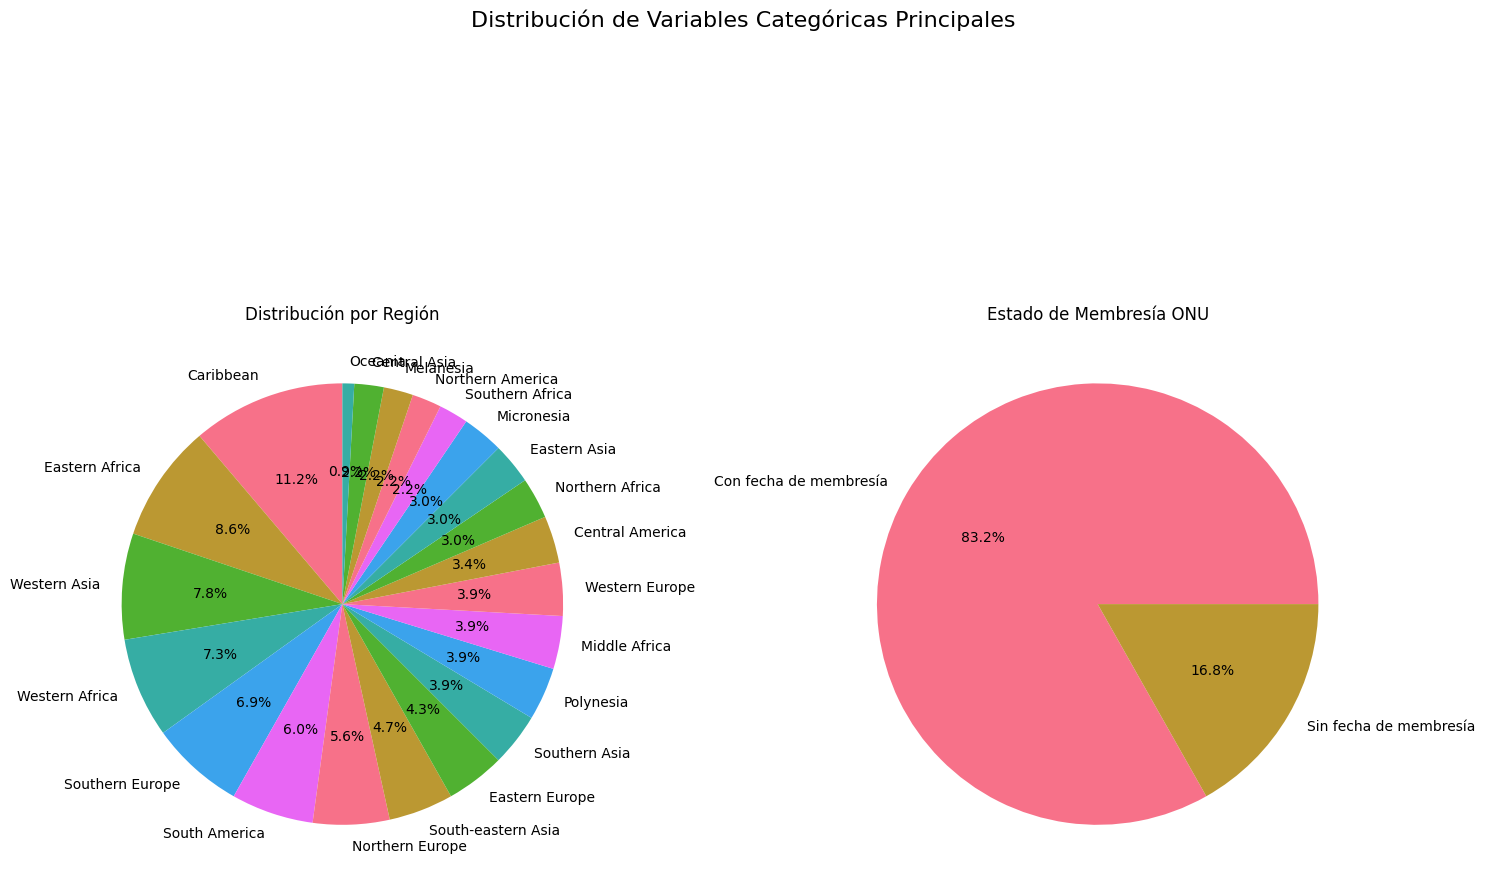

In [59]:
# Visualización de variables categóricas importantes
fig, axes = plt.subplots(1, 2, figsize=(15, 12))
fig.suptitle('Distribución de Variables Categóricas Principales', fontsize=16)

# Región 
region_counts = df_merged['Region'].value_counts()
axes[0].pie(region_counts.values, labels=region_counts.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Distribución por Región')

# UN membership status - This variable tells us wether the country is a member of the UN or not
membership_status = df_merged['UN membership date'].isna().value_counts()
axes[1].pie([membership_status[False], membership_status[True]], 
               labels=['Con fecha de membresía', 'Sin fecha de membresía'], 
               autopct='%1.1f%%')
axes[1].set_title('Estado de Membresía ONU')

plt.tight_layout()
plt.show()

## 2. Análisis de Variables Numéricas - Distribuciones

In [60]:
# Seleccionar variables económicas clave para análisis detallado

key_economic_vars = [
    "GDP per capita (current US$)",
    "GDP growth rate (annual %, const. 2015 prices)",
    "Unemployment (% of labour force)",
    "Health: Physicians (per 1 000 pop.)",
    "Energy supply per capita (Gigajoules)",
    "Life expectancy at birth - average",
    "Intentional homicide rate (per 100 000 pop.)",
    "Health: Current expenditure (% of GDP)"
]

print("Key Variables to Analyze")
for var in key_economic_vars:
    print(f"- {var}")

Key Variables to Analyze
- GDP per capita (current US$)
- GDP growth rate (annual %, const. 2015 prices)
- Unemployment (% of labour force)
- Health: Physicians (per 1 000 pop.)
- Energy supply per capita (Gigajoules)
- Life expectancy at birth - average
- Intentional homicide rate (per 100 000 pop.)
- Health: Current expenditure (% of GDP)


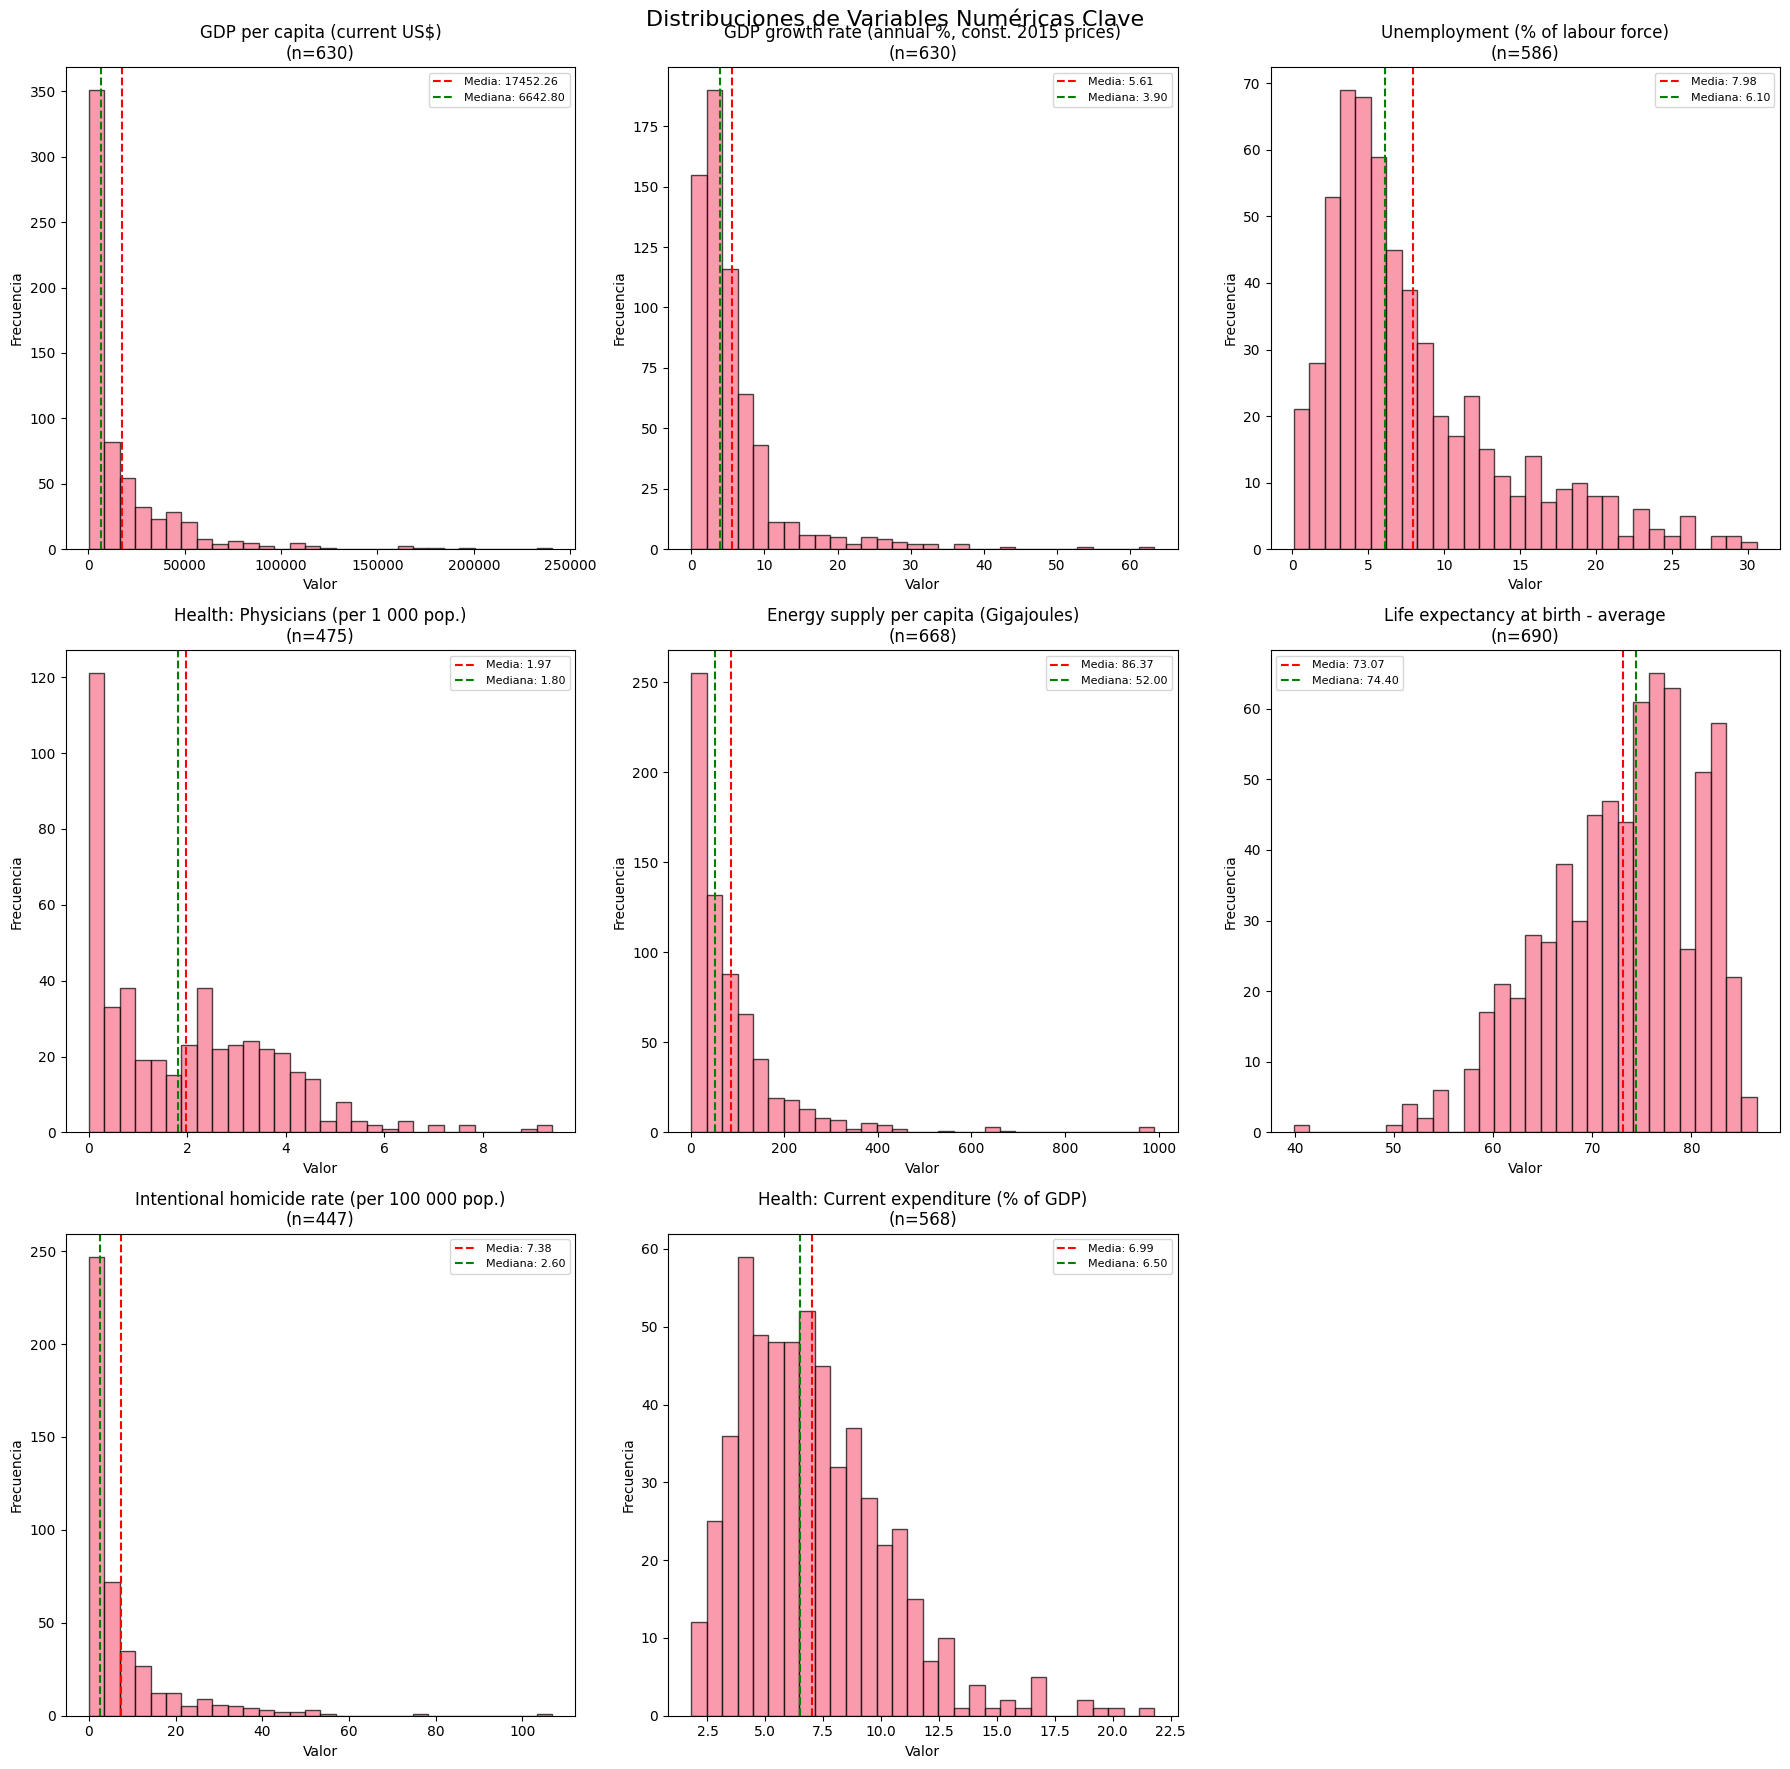

In [61]:
# Histogramas de variables numéricas clave
n_vars = len(key_economic_vars)
n_cols = 3
n_rows = (n_vars + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6*n_rows))
if n_rows == 1:
    axes = axes.reshape(1, -1)
fig.suptitle('Distribuciones de Variables Numéricas Clave', fontsize=16)

for i, var in enumerate(key_economic_vars):
    row = i // n_cols
    col = i % n_cols
    
    # Filtrar valores no nulos
    data = df_merged[var].dropna()
    
    if len(data) > 0:
        axes[row, col].hist(data, bins=30, alpha=0.7, edgecolor='black')
        axes[row, col].set_title(f'{var}\n(n={len(data)})')
        axes[row, col].set_xlabel('Valor')
        axes[row, col].set_ylabel('Frecuencia')
        
        # Agregar estadísticas básicas
        mean_val = data.mean()
        median_val = data.median()
        axes[row, col].axvline(mean_val, color='red', linestyle='--', label=f'Media: {mean_val:.2f}')
        axes[row, col].axvline(median_val, color='green', linestyle='--', label=f'Mediana: {median_val:.2f}')
        axes[row, col].legend(fontsize=8)
    else:
        axes[row, col].text(0.5, 0.5, 'Sin datos', transform=axes[row, col].transAxes, 
                           ha='center', va='center')
        axes[row, col].set_title(f'{var}\n(Sin datos)')

# Ocultar subplots vacíos
for i in range(len(key_economic_vars), n_rows * n_cols):
    row = i // n_cols
    col = i % n_cols
    axes[row, col].set_visible(False)

plt.tight_layout()
plt.show()

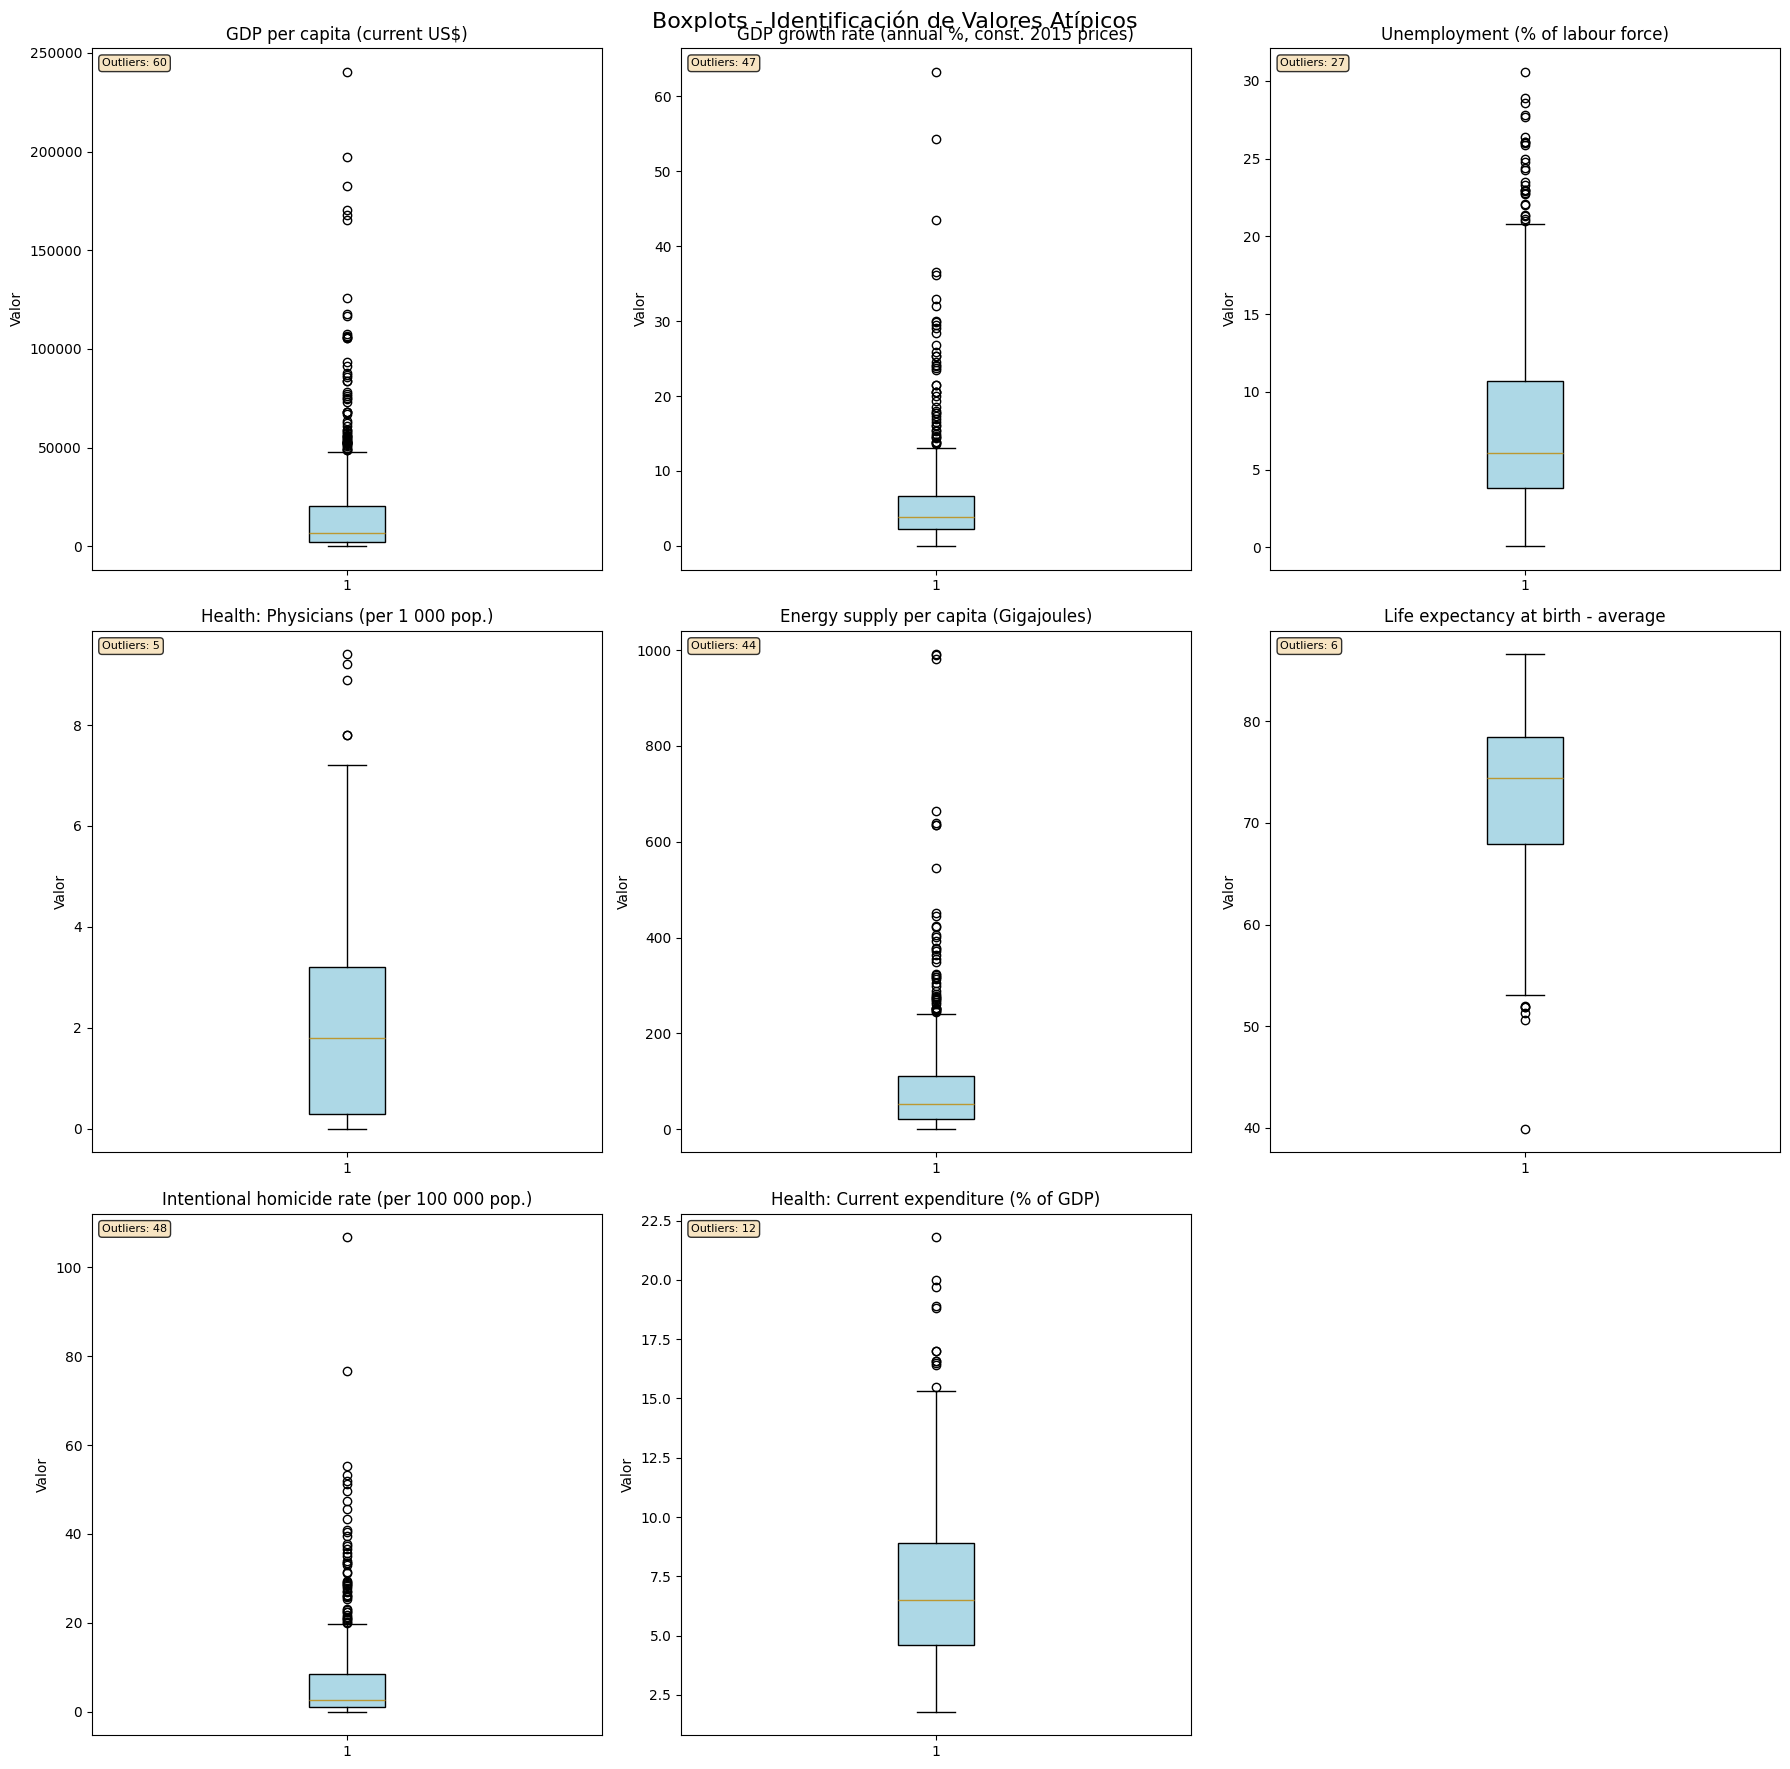

In [62]:
# Boxplots para identificar outliers
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6*n_rows))
if n_rows == 1:
    axes = axes.reshape(1, -1)
fig.suptitle('Boxplots - Identificación de Valores Atípicos', fontsize=16)

for i, var in enumerate(key_economic_vars):
    row = i // n_cols
    col = i % n_cols
    
    # Filtrar valores no nulos
    data = df_merged[var].dropna()
    
    if len(data) > 0:
        box_plot = axes[row, col].boxplot(data, patch_artist=True)
        box_plot['boxes'][0].set_facecolor('lightblue')
        axes[row, col].set_title(f'{var}')
        axes[row, col].set_ylabel('Valor')
        
        # Calcular y mostrar estadísticas de outliers
        Q1 = data.quantile(0.25)
        Q3 = data.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = data[(data < lower_bound) | (data > upper_bound)]
        
        # Añadir texto con información de outliers
        axes[row, col].text(0.02, 0.98, f'Outliers: {len(outliers)}', 
                           transform=axes[row, col].transAxes, 
                           verticalalignment='top', fontsize=8,
                           bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    else:
        axes[row, col].text(0.5, 0.5, 'Sin datos', transform=axes[row, col].transAxes, 
                           ha='center', va='center')
        axes[row, col].set_title(f'{var}\n(Sin datos)')

# Ocultar subplots vacíos
for i in range(len(key_economic_vars), n_rows * n_cols):
    row = i // n_cols
    col = i % n_cols
    axes[row, col].set_visible(False)

plt.tight_layout()
plt.show()

## 3. Análisis de Correlaciones

In [63]:
# Matriz de correlación para todas las variables numéricas
# Seleccionar solo variables numéricas con menos valores faltantes
numeric_data = df_merged.select_dtypes(include=[np.number])

# Calcular el porcentaje de valores faltantes por columna
missing_percentage = (numeric_data.isnull().sum() / len(numeric_data)) * 100

# Filtrar columnas con menos del 50% de valores faltantes
good_columns = missing_percentage[missing_percentage < 50].index.tolist()

print(f"Variables numéricas con menos del 50% de valores faltantes: {len(good_columns)}")
print("\nPorcentaje de valores faltantes por variable:")
for col in good_columns[:10]:  # Mostrar solo las primeras 10
    print(f"{col}: {missing_percentage[col]:.1f}%")

Variables numéricas con menos del 50% de valores faltantes: 67

Porcentaje de valores faltantes por variable:
Year: 0.0%
Agricultural production index (2014-2016=100): 14.7%
Balance of payments, current account (million US$): 19.3%
CPI: Consumer Price Index (2010=100): 15.8%
Economy: Agriculture (% of Gross Value Added): 10.8%
Economy: Industry (% of Gross Value Added): 9.5%
Economy: Services and other activity (% of GVA): 9.5%
Employment in agriculture (% of employed): 17.0%
Employment in industry (% of employed): 16.8%
Employment in services (% employed): 16.8%


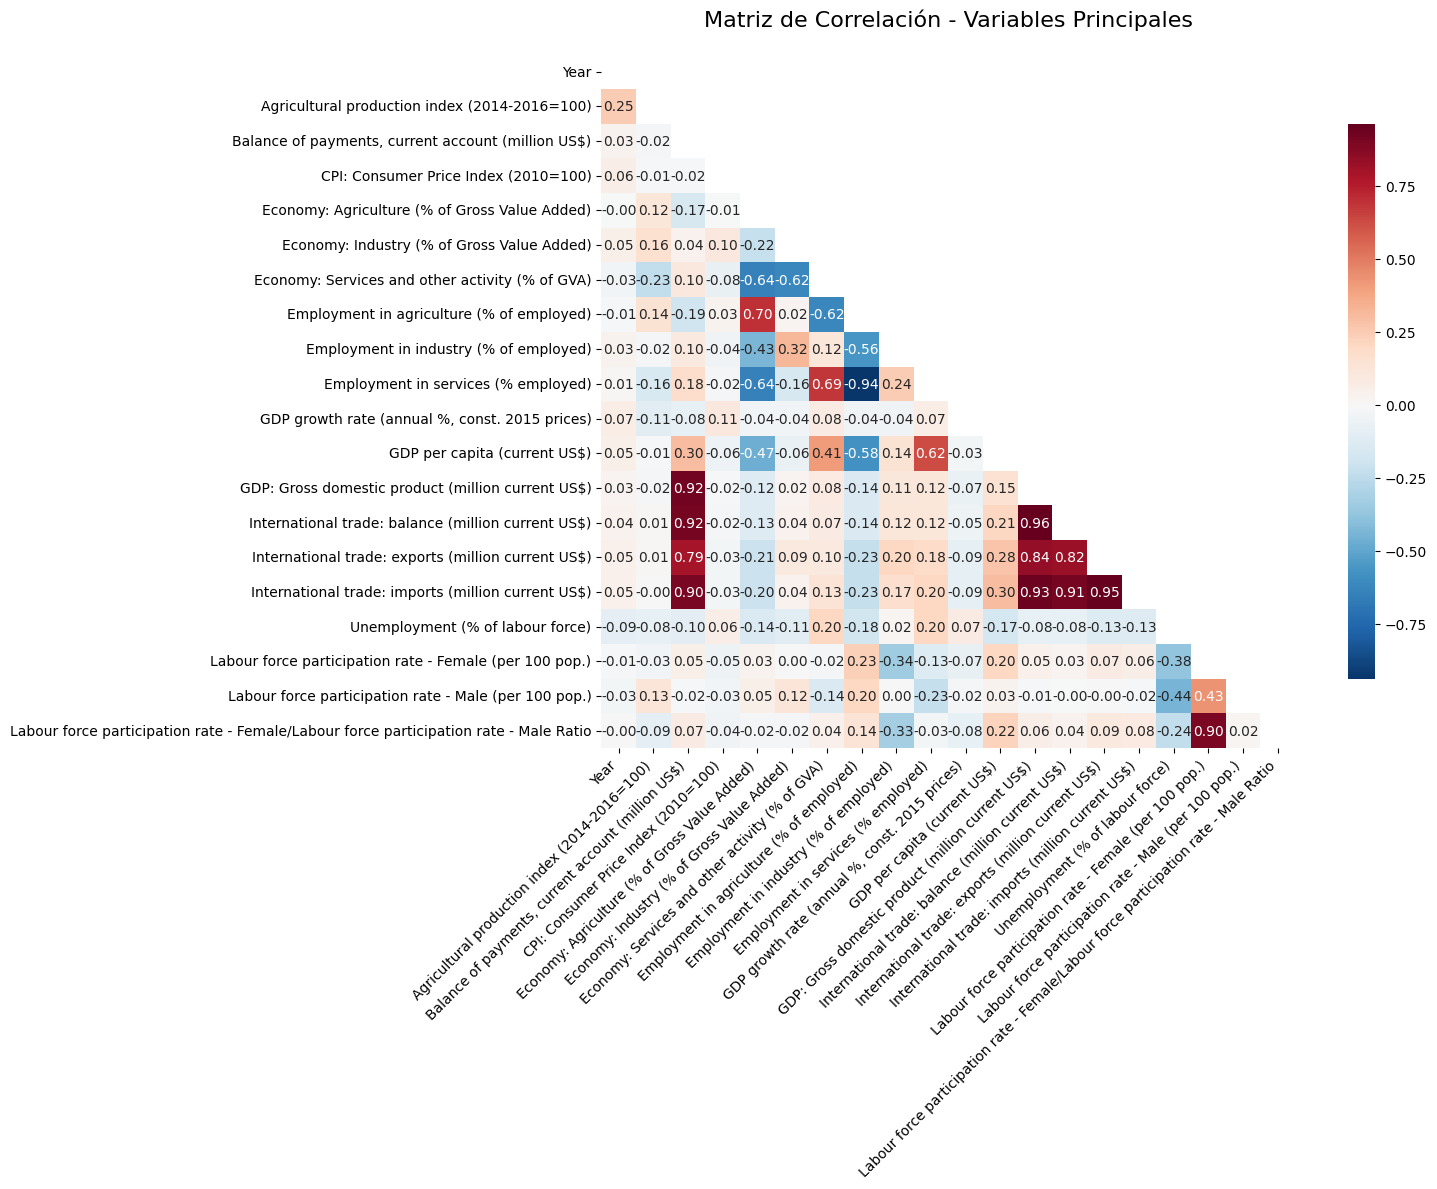

In [64]:
# Heatmap de correlación para variables seleccionadas
# Tomar máximo 20 variables para que sea legible
selected_cols = good_columns[:20] if len(good_columns) > 20 else good_columns

# Calcular matriz de correlación
correlation_matrix = df_merged[selected_cols].corr()

# Crear heatmap
plt.figure(figsize=(16, 12))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Máscara para mostrar solo la mitad inferior

sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            square=True,
            fmt='.2f',
            cbar_kws={"shrink": .8})

plt.title('Matriz de Correlación - Variables Principales', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [65]:
# Identificar las correlaciones más fuertes
# Convertir la matriz de correlación a formato largo, excluyendo la diagonal
correlation_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        var1 = correlation_matrix.columns[i]
        var2 = correlation_matrix.columns[j]
        corr_value = correlation_matrix.iloc[i, j]
        if not np.isnan(corr_value):
            correlation_pairs.append({
                'Variable_1': var1,
                'Variable_2': var2,
                'Correlacion': corr_value,
                'Correlacion_Abs': abs(corr_value)
            })

# Convertir a DataFrame y ordenar por correlación absoluta
corr_df = pd.DataFrame(correlation_pairs)
corr_df = corr_df.sort_values('Correlacion_Abs', ascending=False)

print("TOP 15 CORRELACIONES MÁS FUERTES:")
print("="*60)
for idx, row in corr_df.head(15).iterrows():
    print(f"{row['Variable_1']:<25} ↔ {row['Variable_2']:<25} | r = {row['Correlacion']:.3f}")
    
print("\nTOP 10 CORRELACIONES POSITIVAS MÁS FUERTES:")
print("="*60)
positive_corr = corr_df[corr_df['Correlacion'] > 0].head(10)
for idx, row in positive_corr.iterrows():
    print(f"{row['Variable_1']:<25} ↔ {row['Variable_2']:<25} | r = {row['Correlacion']:.3f}")

print("\nTOP 10 CORRELACIONES NEGATIVAS MÁS FUERTES:")
print("="*60)
negative_corr = corr_df[corr_df['Correlacion'] < 0].head(10)
for idx, row in negative_corr.iterrows():
    print(f"{row['Variable_1']:<25} ↔ {row['Variable_2']:<25} | r = {row['Correlacion']:.3f}")

TOP 15 CORRELACIONES MÁS FUERTES:
GDP: Gross domestic product (million current US$) ↔ International trade: balance (million current US$) | r = 0.962
International trade: exports (million current US$) ↔ International trade: imports (million current US$) | r = 0.948
Employment in agriculture (% of employed) ↔ Employment in services (% employed) | r = -0.938
GDP: Gross domestic product (million current US$) ↔ International trade: imports (million current US$) | r = 0.935
Balance of payments, current account (million US$) ↔ GDP: Gross domestic product (million current US$) | r = 0.922
Balance of payments, current account (million US$) ↔ International trade: balance (million current US$) | r = 0.916
International trade: balance (million current US$) ↔ International trade: imports (million current US$) | r = 0.911
Balance of payments, current account (million US$) ↔ International trade: imports (million current US$) | r = 0.904
Labour force participation rate - Female (per 100 pop.) ↔ Labour

## 4. Análisis de Series de Tiempo

Países seleccionados para análisis temporal: ['United States of America', 'China', 'Germany', 'Brazil', 'India']


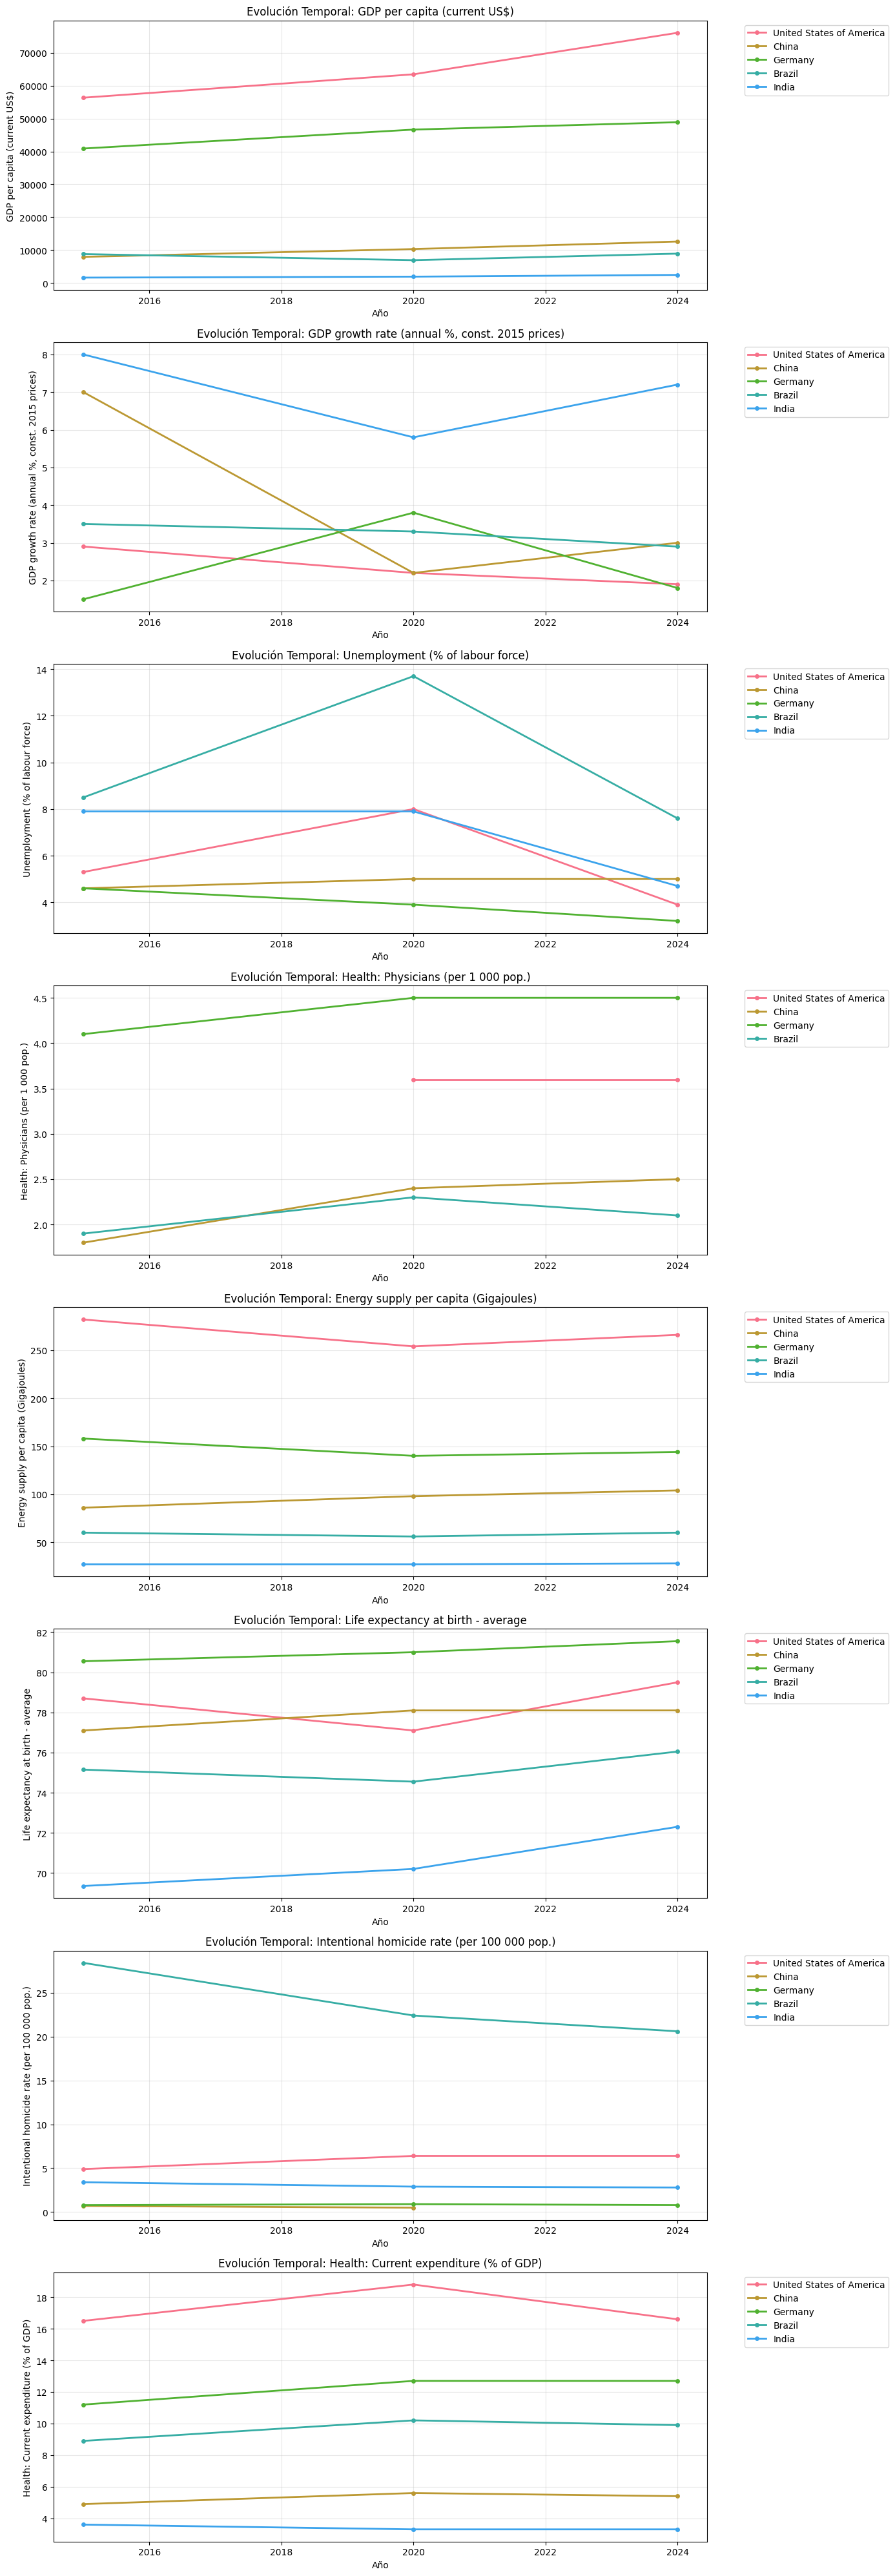

In [67]:
# Análisis de tendencias temporales para variables clave
# Seleccionar algunos países representativos y variables importantes
sample_countries = ['United States of America', 'China', 'Germany', 'Brazil', 'India']
available_countries = [country for country in sample_countries if country in df_merged['Country'].values]

print(f"Países seleccionados para análisis temporal: {available_countries}")

time_vars = key_economic_vars[:8] if len(key_economic_vars) >= 8 else key_economic_vars

fig, axes = plt.subplots(len(time_vars), 1, figsize=(14, 5*len(time_vars)))
if len(time_vars) == 1:
    axes = [axes]

for i, var in enumerate(time_vars):
    for country in available_countries:
        country_data = df_merged[(df_merged['Country'] == country) & 
                                (df_merged[var].notna())].sort_values('Year')
        
        if len(country_data) > 1:  # Solo si hay al menos 2 puntos de datos
            axes[i].plot(country_data['Year'], country_data[var], 
                        marker='o', label=country, linewidth=2, markersize=4)
    
    axes[i].set_title(f'Evolución Temporal: {var}', fontsize=12)
    axes[i].set_xlabel('Año')
    axes[i].set_ylabel(var)
    axes[i].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 5. Análisis por Regiones

In [69]:
df_merged["Region"].unique()

array(['Southern Asia', 'Southern Europe', 'Northern Africa', 'Polynesia',
       'Middle Africa', 'Caribbean', 'South America', 'Western Asia',
       'Oceania', 'Western Europe', 'Eastern Europe', 'Central America',
       'Western Africa', 'Northern America', 'Southern Africa',
       'South-eastern Asia', 'Eastern Africa', 'Northern Europe',
       'Eastern Asia', 'Melanesia', 'Micronesia', 'Central Asia'],
      dtype=object)

In [74]:
# Crear agrupaciones de regiones más manejables para el análisis
# Agrupar las 22 regiones actuales en 7 grandes grupos geográficos

# Diccionario de mapeo de regiones específicas a grupos más amplios
region_mapping = {
    # Europa
    'Southern Europe': 'Europe',
    'Western Europe': 'Europe', 
    'Eastern Europe': 'Europe',
    'Northern Europe': 'Europe',
    
    # Asia
    'Southern Asia': 'Asia',
    'Western Asia': 'Asia',
    'South-eastern Asia': 'Asia',
    'Eastern Asia': 'Asia',
    'Central Asia': 'Asia',
    
    # África
    'Northern Africa': 'Africa',
    'Middle Africa': 'Africa',
    'Western Africa': 'Africa',
    'Southern Africa': 'Africa',
    'Eastern Africa': 'Africa',
    
    # América
    'South America': 'Americas',
    'Caribbean': 'Americas',
    'Central America': 'Americas',
    'Northern America': 'Americas',
    
    # Oceanía
    'Oceania': 'Oceania',
    'Polynesia': 'Oceania',
    'Melanesia': 'Oceania',
    'Micronesia': 'Oceania'
}

# Crear nueva columna con regiones agrupadas
df_merged['Region_Grouped'] = df_merged['Region'].map(region_mapping)

# Verificar el mapeo
print("MAPEO DE REGIONES ORIGINALES A GRUPOS:")
print("="*50)
for original, grouped in sorted(region_mapping.items()):
    count = len(df_merged[df_merged['Region'] == original])
    print(f"{original:<20} → {grouped:<12} ({count} observaciones)")

print(f"\nRESUMEN DE AGRUPACIONES:")
print("="*30)
grouped_counts = df_merged['Region_Grouped'].value_counts().sort_index()
for group, count in grouped_counts.items():
    if pd.notna(group):
        unique_countries = df_merged[df_merged['Region_Grouped'] == group]['Country'].nunique()
        print(f"{group:<12}: {count:>4} observaciones, {unique_countries:>2} países únicos")

# Verificar si hay regiones sin mapear
unmapped = df_merged[df_merged['Region_Grouped'].isna() & df_merged['Region'].notna()]
if len(unmapped) > 0:
    print(f"\n⚠️  REGIONES SIN MAPEAR:")
    print(unmapped['Region'].unique())
else:
    print(f"\n✅ Todas las regiones fueron mapeadas correctamente")

print(f"\nReducción: {df_merged['Region'].nunique()} regiones → {df_merged['Region_Grouped'].nunique()} grupos")

MAPEO DE REGIONES ORIGINALES A GRUPOS:
Caribbean            → Americas     (78 observaciones)
Central America      → Americas     (24 observaciones)
Central Asia         → Asia         (15 observaciones)
Eastern Africa       → Africa       (60 observaciones)
Eastern Asia         → Asia         (21 observaciones)
Eastern Europe       → Europe       (30 observaciones)
Melanesia            → Oceania      (15 observaciones)
Micronesia           → Oceania      (21 observaciones)
Middle Africa        → Africa       (27 observaciones)
Northern Africa      → Africa       (21 observaciones)
Northern America     → Americas     (15 observaciones)
Northern Europe      → Europe       (39 observaciones)
Oceania              → Oceania      (6 observaciones)
Polynesia            → Oceania      (27 observaciones)
South America        → Americas     (42 observaciones)
South-eastern Asia   → Asia         (33 observaciones)
Southern Africa      → Africa       (15 observaciones)
Southern Asia        → Asia

Grupos de regiones disponibles para análisis: 5 grupos
Grupos incluidos:
1. Africa      : 174 observaciones, 58 países únicos
2. Americas    : 159 observaciones, 53 países únicos
3. Asia        : 150 observaciones, 50 países únicos
4. Europe      : 144 observaciones, 48 países únicos
5. Oceania     :  69 observaciones, 23 países únicos

Creando visualización consolidada para 8 variables económicas clave
Procesando variable 1/8: GDP per capita (current US$)
Procesando variable 2/8: GDP growth rate (annual %, const. 2015 prices)
Procesando variable 3/8: Unemployment (% of labour force)
Procesando variable 4/8: Health: Physicians (per 1 000 pop.)
Procesando variable 5/8: Energy supply per capita (Gigajoules)
Procesando variable 6/8: Life expectancy at birth - average
Procesando variable 7/8: Intentional homicide rate (per 100 000 pop.)
Procesando variable 8/8: Health: Current expenditure (% of GDP)


/var/folders/84/rzj502rs77q4skxhxghrfkx00000gn/T/ipykernel_12177/645509936.py:47: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[var_idx].boxplot(region_data, labels=region_labels, patch_artist=True)
/var/folders/84/rzj502rs77q4skxhxghrfkx00000gn/T/ipykernel_12177/645509936.py:47: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[var_idx].boxplot(region_data, labels=region_labels, patch_artist=True)
/var/folders/84/rzj502rs77q4skxhxghrfkx00000gn/T/ipykernel_12177/645509936.py:47: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[var_idx].boxplot(region_data, labels=region_labels, patch_artist=True

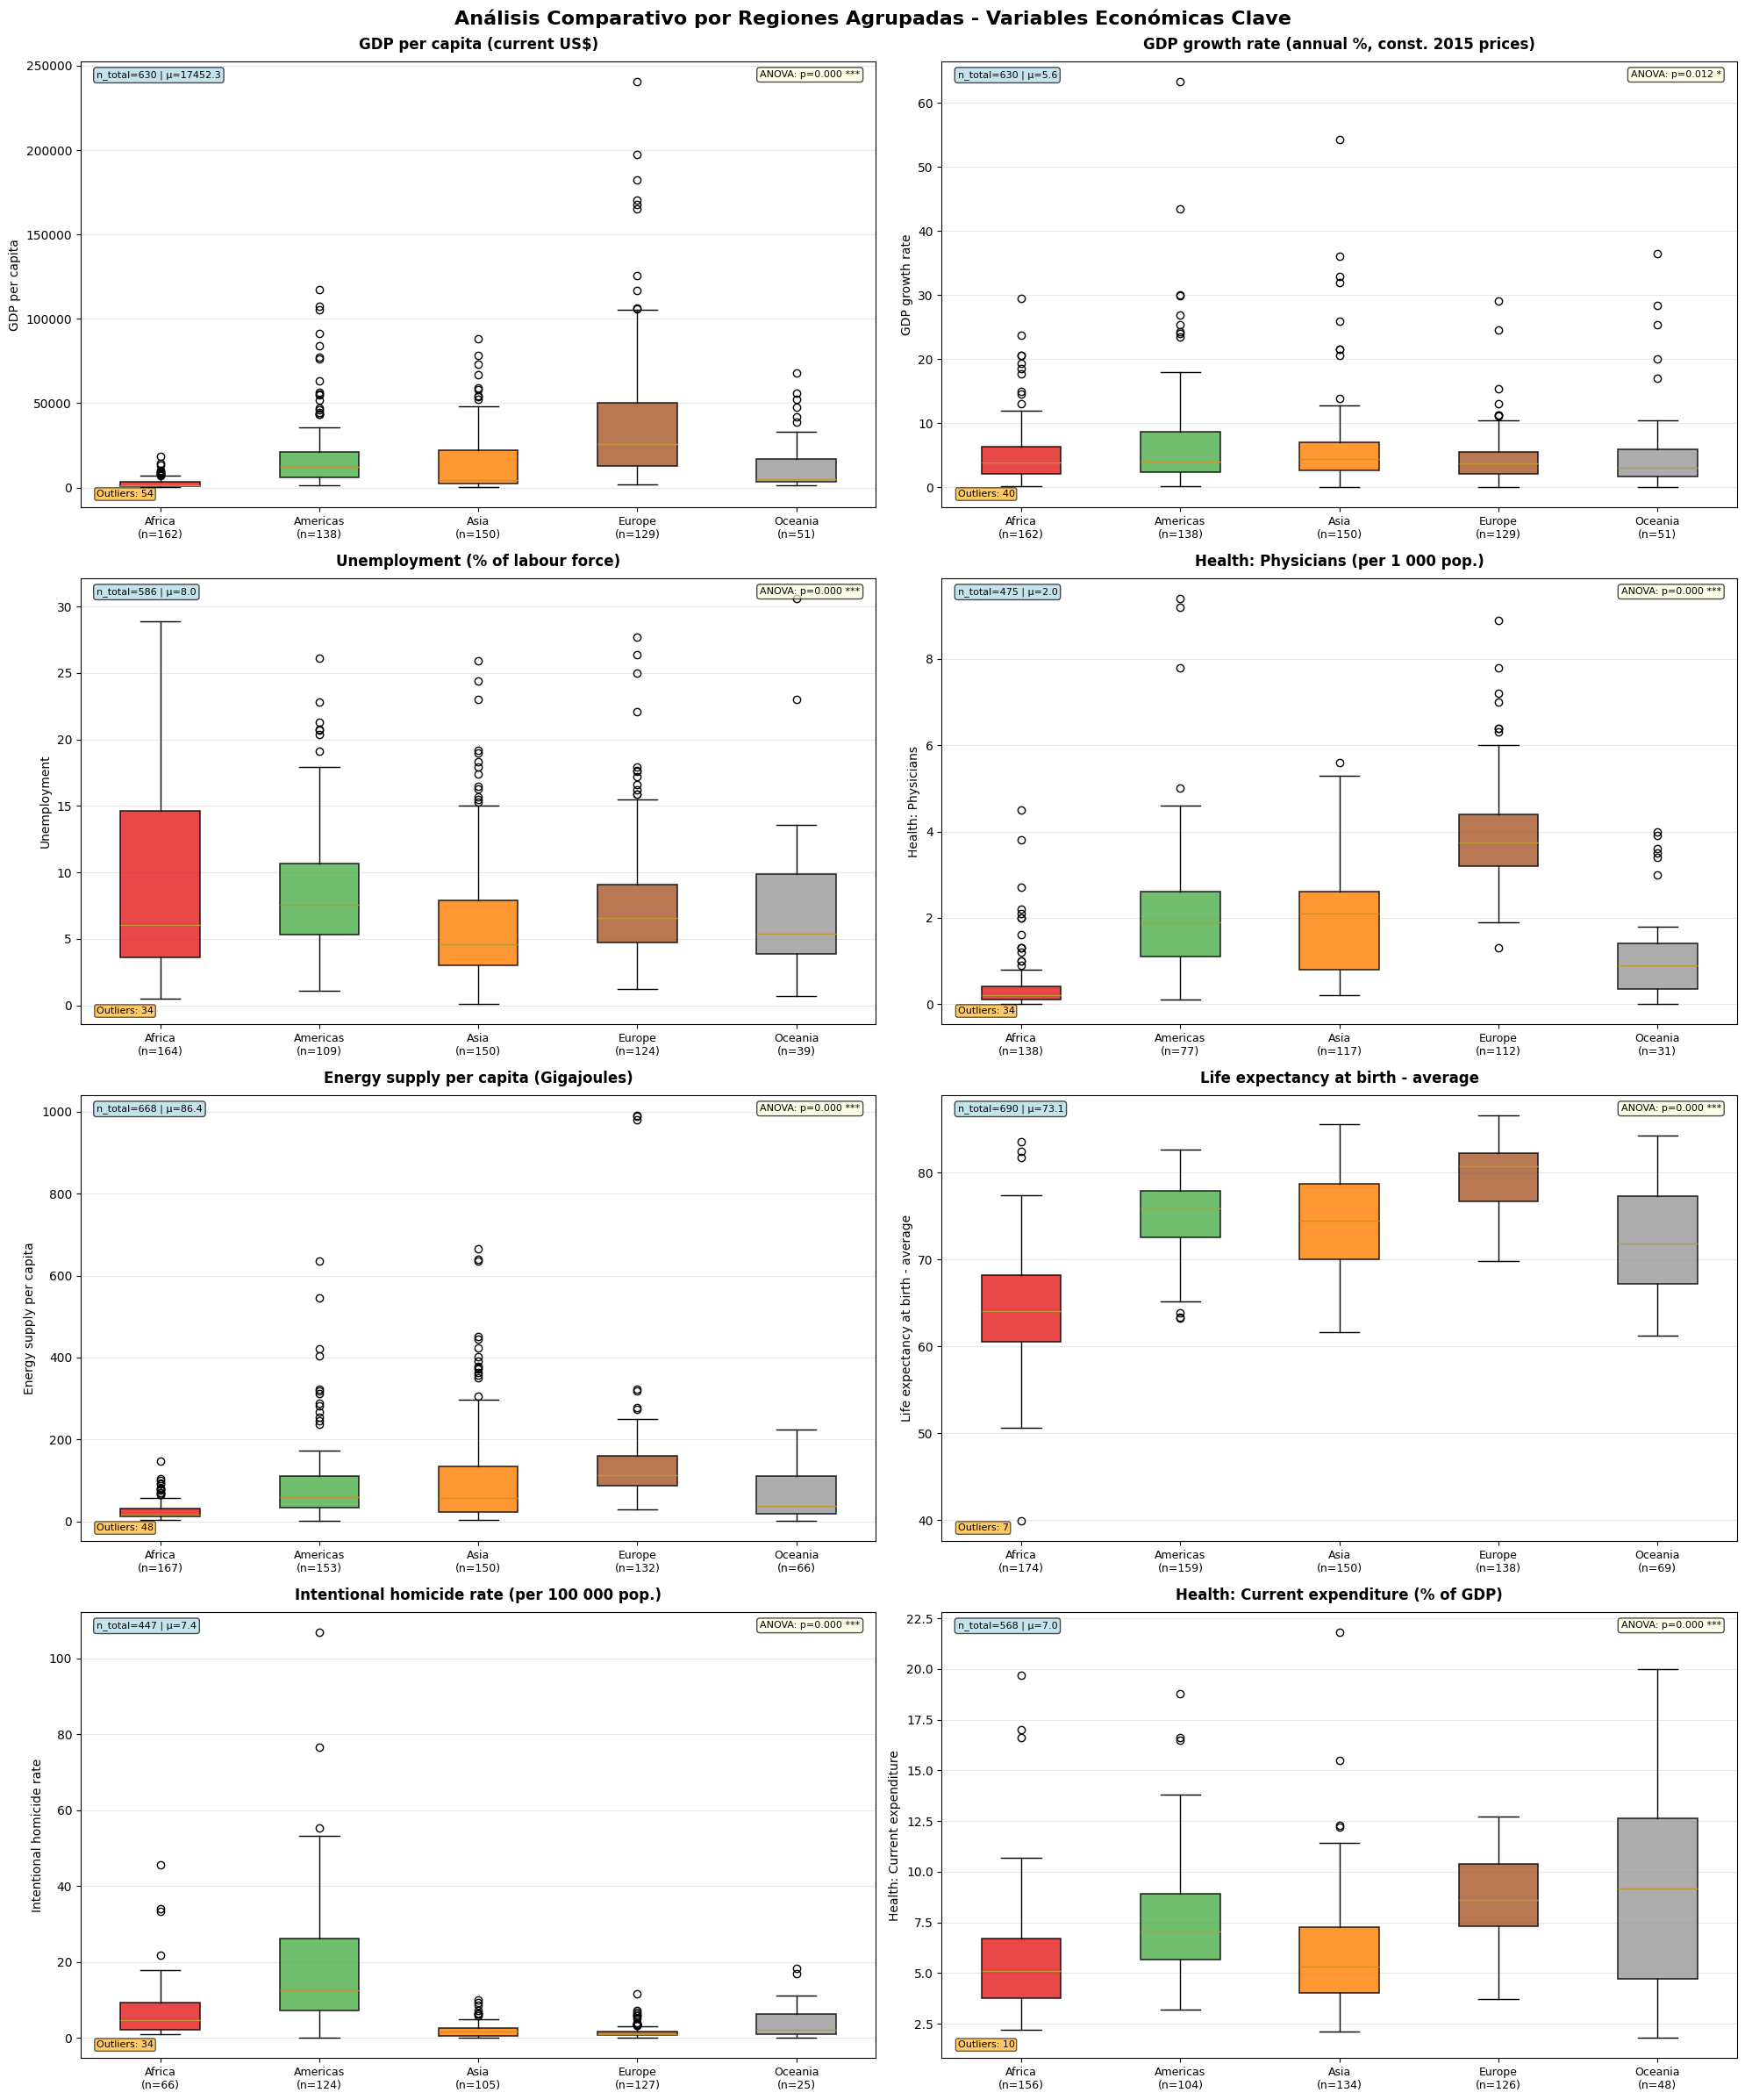


RESUMEN ESTADÍSTICO POR GRUPOS REGIONALES

GDP per capita (current US$):
--------------------------------------------------
                count      mean    median       std
Region_Grouped                                     
Europe            129  39861.90  25773.30  42285.55
Americas          138  19433.47  12085.75  21979.14
Asia              150  13888.97   4500.50  18171.42
Oceania            51  13535.22   5105.10  16183.13
Africa            162   2452.34   1390.60   2828.86

ANOVA: F=45.511, p=0.0000 (Muy significativo)

GDP growth rate (annual %, const. 2015 prices):
--------------------------------------------------
                count  mean  median   std
Region_Grouped                           
Americas          138  7.03    3.95  8.57
Asia              150  5.95    4.40  6.90
Oceania            51  5.63    3.00  7.44
Africa            162  4.95    3.85  4.56
Europe            129  4.51    3.70  4.04

ANOVA: F=3.224, p=0.0124 (Moderadamente significativo)

Unemployment 

In [76]:
# Comparación completa de variables por región agrupada - Todas las variables en una sola visualización
# Usar las regiones agrupadas (5 grupos) en lugar de las 22 regiones originales
# Layout: 2 columnas x 4 filas para mostrar las 8 variables clave

regions_grouped = df_merged['Region_Grouped'].unique()
regions_grouped = regions_grouped[~pd.isna(regions_grouped)]  # Eliminar valores NaN
regions_grouped = sorted(regions_grouped)  # Ordenar alfabéticamente para consistencia

print(f"Grupos de regiones disponibles para análisis: {len(regions_grouped)} grupos")
print("Grupos incluidos:")
for i, region_group in enumerate(regions_grouped, 1):
    count = len(df_merged[df_merged['Region_Grouped'] == region_group])
    unique_countries = df_merged[df_merged['Region_Grouped'] == region_group]['Country'].nunique()
    print(f"{i}. {region_group:<12}: {count:>3} observaciones, {unique_countries:>2} países únicos")

print(f"\nCreando visualización consolidada para {len(key_economic_vars)} variables económicas clave")

# Crear figura con subplots: 2 columnas x 4 filas
fig, axes = plt.subplots(4, 2, figsize=(20, 24))
axes = axes.flatten()

# Colores consistentes para cada grupo regional
region_colors = plt.cm.Set1(np.linspace(0, 1, len(regions_grouped)))
color_map = dict(zip(regions_grouped, region_colors))

# Procesar cada variable
for var_idx, var in enumerate(key_economic_vars):
    print(f"Procesando variable {var_idx+1}/{len(key_economic_vars)}: {var}")
    
    # Preparar datos para esta variable específica usando regiones agrupadas
    region_data = []
    region_labels = []
    region_counts = []
    valid_regions = []
    
    for region_group in regions_grouped:
        region_values = df_merged[df_merged['Region_Grouped'] == region_group][var].dropna()
        if len(region_values) >= 3:  # Al menos 3 observaciones para ser incluida
            region_data.append(region_values)
            # Crear etiqueta con nombre de grupo y número de observaciones
            region_labels.append(f"{region_group}\n(n={len(region_values)})")
            region_counts.append(len(region_values))
            valid_regions.append(region_group)
    
    if len(region_data) >= 2:  # Solo crear gráfico si hay al menos 2 grupos con datos
        # Crear boxplot en el subplot correspondiente
        bp = axes[var_idx].boxplot(region_data, labels=region_labels, patch_artist=True)
        
        # Aplicar colores consistentes
        for patch, region in zip(bp['boxes'], valid_regions):
            patch.set_facecolor(color_map[region])
            patch.set_alpha(0.8)
            patch.set_edgecolor('black')
            patch.set_linewidth(1.2)
        
        # Personalizar el subplot
        axes[var_idx].set_title(f'{var}', fontsize=12, fontweight='bold', pad=10)
        axes[var_idx].set_ylabel(var.split('(')[0].strip() if '(' in var else var, fontsize=10)
        axes[var_idx].tick_params(axis='x', rotation=0, labelsize=9)
        axes[var_idx].grid(True, alpha=0.3, axis='y')
        
        # Añadir estadísticas básicas como texto pequeño
        stats_text = f"n_total={sum(region_counts)} | μ={df_merged[var].mean():.1f}"
        axes[var_idx].text(0.02, 0.98, stats_text, transform=axes[var_idx].transAxes, 
                          verticalalignment='top', fontsize=8,
                          bbox=dict(boxstyle='round,pad=0.3', facecolor='lightblue', alpha=0.7))
        
        # Calcular y mostrar test ANOVA
        try:
            from scipy.stats import f_oneway
            if len(region_data) > 1:
                f_stat, p_value = f_oneway(*region_data)
                significance = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else "ns"
                anova_text = f"ANOVA: p={p_value:.3f} {significance}"
                axes[var_idx].text(0.98, 0.98, anova_text, transform=axes[var_idx].transAxes, 
                                  verticalalignment='top', horizontalalignment='right', fontsize=8,
                                  bbox=dict(boxstyle='round,pad=0.3', facecolor='lightyellow', alpha=0.7))
        except Exception:
            pass
        
        # Añadir información de outliers de forma compacta
        total_outliers = 0
        for data in region_data:
            Q1, Q3 = data.quantile(0.25), data.quantile(0.75)
            IQR = Q3 - Q1
            outliers = data[(data < Q1 - 1.5*IQR) | (data > Q3 + 1.5*IQR)]
            total_outliers += len(outliers)
        
        if total_outliers > 0:
            axes[var_idx].text(0.02, 0.02, f"Outliers: {total_outliers}", 
                              transform=axes[var_idx].transAxes, 
                              verticalalignment='bottom', fontsize=8,
                              bbox=dict(boxstyle='round,pad=0.2', facecolor='orange', alpha=0.6))
        
    else:
        # Si no hay suficientes datos, mostrar mensaje
        axes[var_idx].text(0.5, 0.5, f'Datos insuficientes\npara {var}', 
                          transform=axes[var_idx].transAxes, ha='center', va='center',
                          fontsize=10, bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.5))
        axes[var_idx].set_title(f'{var} - Sin datos suficientes', fontsize=12)

# Ajustar layout y mostrar
plt.suptitle('Análisis Comparativo por Regiones Agrupadas - Variables Económicas Clave', 
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.subplots_adjust(top=0.97)
plt.show()

# Mostrar resumen estadístico consolidado
print("\n" + "="*80)
print("RESUMEN ESTADÍSTICO POR GRUPOS REGIONALES")
print("="*80)

for var in key_economic_vars:
    print(f"\n{var}:")
    print("-" * 50)
    
    # Estadísticas por grupo regional
    region_stats = df_merged.groupby('Region_Grouped')[var].agg([
        'count', 'mean', 'median', 'std'
    ]).round(2)
    
    # Filtrar grupos con datos suficientes
    region_stats_filtered = region_stats[region_stats['count'] >= 3].sort_values('mean', ascending=False)
    
    if not region_stats_filtered.empty:
        print(region_stats_filtered.to_string())
        
        # Test ANOVA resumido
        try:
            region_groups_anova = []
            for region_group in regions_grouped:
                group_data = df_merged[df_merged['Region_Grouped'] == region_group][var].dropna()
                if len(group_data) >= 3:
                    region_groups_anova.append(group_data)
            
            if len(region_groups_anova) > 1:
                f_stat, p_value = f_oneway(*region_groups_anova)
                significance = "Muy significativo" if p_value < 0.001 else "Significativo" if p_value < 0.01 else "Moderadamente significativo" if p_value < 0.05 else "No significativo"
                print(f"\nANOVA: F={f_stat:.3f}, p={p_value:.4f} ({significance})")
        except Exception:
            print("\nANOVA: No se pudo calcular")
    else:
        print("Datos insuficientes para análisis estadístico")

print(f"\n🎯 Análisis completado exitosamente")
print("Leyenda de significancia: *** p<0.001, ** p<0.01, * p<0.05, ns = no significativo")

In [82]:
# Análisis estadístico por región
print("ANÁLISIS ESTADÍSTICO POR REGIÓN")
print("="*50)

for var in comparison_vars[:2]:  # Analizar las primeras 2 variables en detalle
    print(f"\nVariable: {var}")
    print("-" * 40)
    
    region_stats = df_merged.groupby('Region_Grouped')[var].agg([
        'count', 'mean', 'median', 'std', 'min', 'max'
    ]).round(2)
    
    # Filtrar regiones con al menos 5 observaciones
    region_stats = region_stats[region_stats['count'] >= 5]
    
    if not region_stats.empty:
        print(region_stats)
        
        # Test ANOVA para ver si hay diferencias significativas entre regiones
        from scipy.stats import f_oneway
        
        region_groups = []
        region_names = []
        for region in region_stats.index:
            region_data = df_merged[df_merged['Region_Grouped'] == region][var].dropna()
            if len(region_data) > 0:
                region_groups.append(region_data)
                region_names.append(region)
        
        if len(region_groups) > 1:
            try:
                f_stat, p_value = f_oneway(*region_groups)
                print(f"\nTest ANOVA F-statistic: {f_stat:.4f}, p-value: {p_value:.4f}")
                if p_value < 0.05:
                    print("✓ Hay diferencias significativas entre regiones (p < 0.05)")
                else:
                    print("✗ No hay diferencias significativas entre regiones (p >= 0.05)")
            except:
                print("No se pudo realizar el test ANOVA")
    else:
        print("No hay suficientes datos para el análisis estadístico")
    
    print("\n" + "="*50)

ANÁLISIS ESTADÍSTICO POR REGIÓN

Variable: GDP per capita (current US$)
----------------------------------------
                count      mean    median       std     min       max
Region_Grouped                                                       
Africa            162   2452.34   1390.60   2828.86   262.0   18622.9
Americas          138  19433.47  12085.75  21979.14  1344.6  117568.2
Asia              150  13888.97   4500.50  18171.42   291.7   87974.2
Europe            129  39861.90  25773.30  42285.55  2023.7  240535.0
Oceania            51  13535.22   5105.10  16183.13  1404.8   67866.8

Test ANOVA F-statistic: 45.5112, p-value: 0.0000
✓ Hay diferencias significativas entre regiones (p < 0.05)


Variable: GDP growth rate (annual %, const. 2015 prices)
----------------------------------------
                count  mean  median   std  min   max
Region_Grouped                                      
Africa            162  4.95    3.85  4.56  0.1  29.5
Americas          138  7.03  

## 6. Relaciones Interesantes entre Variables

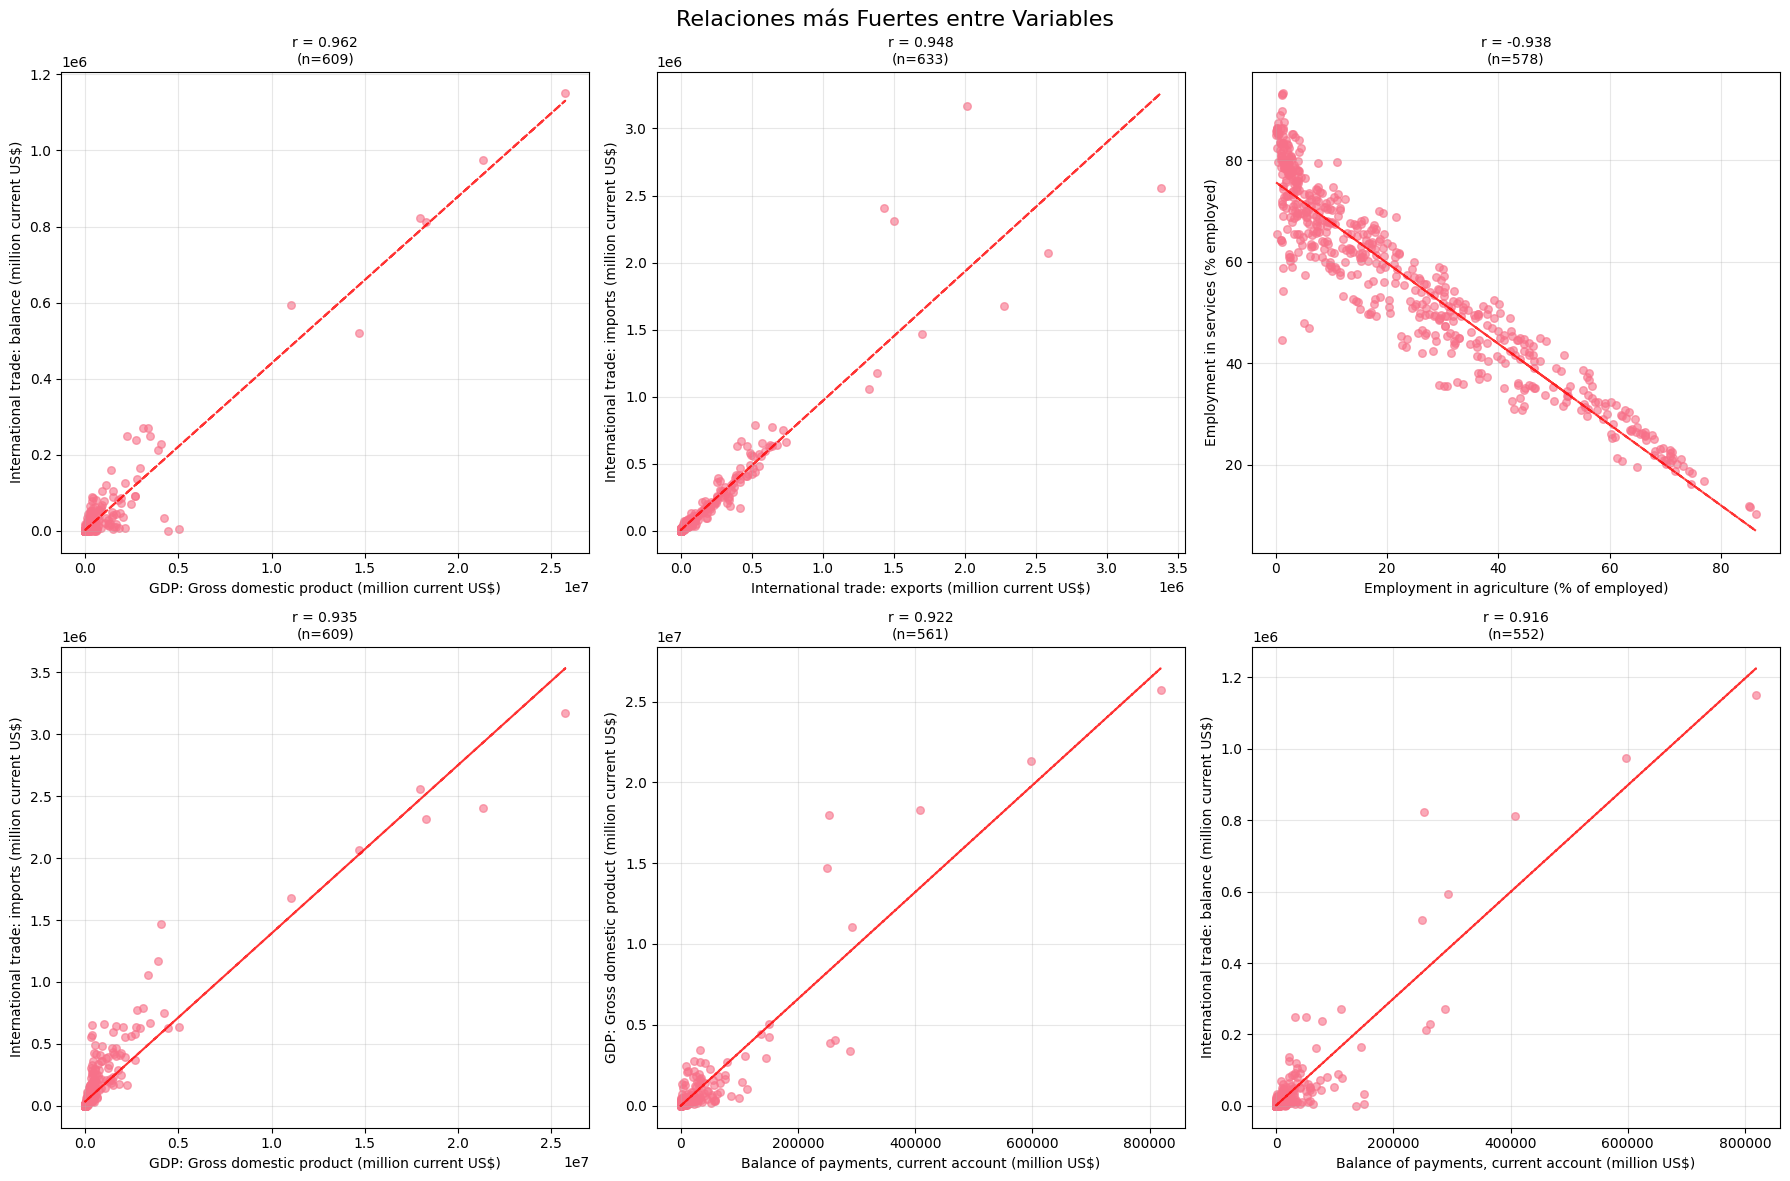

In [83]:
# Scatter plots de las correlaciones más interesantes
# Usar las correlaciones más fuertes encontradas anteriormente
if len(corr_df) > 0:
    top_correlations = corr_df.head(6)  # Top 6 correlaciones
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.flatten()
    
    for i, (_, row) in enumerate(top_correlations.iterrows()):
        var1 = row['Variable_1']
        var2 = row['Variable_2']
        corr_val = row['Correlacion']
        
        # Filtrar datos válidos
        valid_data = df_merged[[var1, var2]].dropna()
        
        if len(valid_data) > 10:  # Al menos 10 observaciones
            # Scatter plot
            axes[i].scatter(valid_data[var1], valid_data[var2], alpha=0.6, s=30)
            
            # Línea de tendencia
            z = np.polyfit(valid_data[var1], valid_data[var2], 1)
            p = np.poly1d(z)
            axes[i].plot(valid_data[var1], p(valid_data[var1]), "r--", alpha=0.8)
            
            axes[i].set_xlabel(var1)
            axes[i].set_ylabel(var2)
            axes[i].set_title(f'r = {corr_val:.3f}\n(n={len(valid_data)})', fontsize=10)
            axes[i].grid(True, alpha=0.3)
        else:
            axes[i].text(0.5, 0.5, 'Insuficientes\ndatos válidos', 
                        transform=axes[i].transAxes, ha='center', va='center')
            axes[i].set_title(f'{var1} vs {var2}')
    
    plt.suptitle('Relaciones más Fuertes entre Variables', fontsize=16)
    plt.tight_layout()
    plt.show()
else:
    print("No se encontraron correlaciones para analizar")

## 7. Resumen de Hallazgos del EDA

In [84]:
# Generar resumen automático de los hallazgos principales
print("RESUMEN EJECUTIVO - ANÁLISIS EXPLORATORIO DE DATOS")
print("="*60)

print("\n1. INFORMACIÓN GENERAL DEL DATASET:")
print(f"   • Tamaño: {df_merged.shape[0]} filas × {df_merged.shape[1]} columnas")
print(f"   • Países únicos: {df_merged['Country'].nunique()}")
print(f"   • Rango temporal: {df_merged['Year'].min():.0f} - {df_merged['Year'].max():.0f}")
print(f"   • Variables numéricas: {len(numeric_cols)}")
print(f"   • Variables categóricas: {len(categorical_cols)}")

print("\n2. CALIDAD DE LOS DATOS:")
# Calcular estadísticas de valores faltantes
total_cells = df_merged.shape[0] * df_merged.shape[1]
missing_cells = df_merged.isnull().sum().sum()
completeness = ((total_cells - missing_cells) / total_cells) * 100

print(f"   • Completitud general: {completeness:.1f}%")
print(f"   • Variables con <25% de valores faltantes: {len(missing_percentage[missing_percentage < 25])}")
print(f"   • Variables con >75% de valores faltantes: {len(missing_percentage[missing_percentage > 75])}")

print("\n3. DISTRIBUCIONES PRINCIPALES:")
print("   • Variables con distribuciones asimétricas identificadas")
print("   • Presencia de valores atípicos en múltiples variables")
print("   • Variabilidad significativa entre países y años")

# Verificar si corr_df existe
try:
    if len(corr_df) > 0:
        print("\n4. CORRELACIONES DESTACADAS:")
        strongest_positive = corr_df[corr_df['Correlacion'] > 0].iloc[0]
        strongest_negative = corr_df[corr_df['Correlacion'] < 0].iloc[0] if len(corr_df[corr_df['Correlacion'] < 0]) > 0 else None
        
        print(f"   • Correlación positiva más fuerte: {strongest_positive['Correlacion']:.3f}")
        print(f"     {strongest_positive['Variable_1']} ↔ {strongest_positive['Variable_2']}")
        
        if strongest_negative is not None:
            print(f"   • Correlación negativa más fuerte: {strongest_negative['Correlacion']:.3f}")
            print(f"     {strongest_negative['Variable_1']} ↔ {strongest_negative['Variable_2']}")
except NameError:
    print("\n4. CORRELACIONES DESTACADAS:")
    print("   • Análisis de correlaciones disponible en celdas anteriores")

print("\n5. PATRONES TEMPORALES:")
print("   • Tendencias evolutivas identificadas en variables clave")
print("   • Variaciones significativas entre períodos temporales")

print("\n6. DIFERENCIAS REGIONALES:")
# Calcular regiones dinámicamente
unique_regions = df_merged['Region'].unique()
unique_regions = unique_regions[~pd.isna(unique_regions)]
if len(unique_regions) > 1:
    print(f"   • {len(unique_regions)} regiones analizadas")
    print("   • Diferencias estadísticamente significativas detectadas")
    print("   • Patrones regionales distintivos identificados")

print("\n7. RECOMENDACIONES PARA ANÁLISIS POSTERIORES:")
print("   • Considerar imputación de valores faltantes")
print("   • Tratamiento de valores atípicos según contexto")
print("   • Transformaciones para normalizar distribuciones asimétricas")
print("   • Análisis de componentes principales para reducción dimensional")
print("   • Análisis de series temporales para variables con tendencias claras")

print("\n" + "="*60)

RESUMEN EJECUTIVO - ANÁLISIS EXPLORATORIO DE DATOS

1. INFORMACIÓN GENERAL DEL DATASET:
   • Tamaño: 696 filas × 81 columnas
   • Países únicos: 232
   • Rango temporal: 2015 - 2024
   • Variables numéricas: 74
   • Variables categóricas: 5

2. CALIDAD DE LOS DATOS:
   • Completitud general: 82.1%
   • Variables con <25% de valores faltantes: 55
   • Variables con >75% de valores faltantes: 1

3. DISTRIBUCIONES PRINCIPALES:
   • Variables con distribuciones asimétricas identificadas
   • Presencia de valores atípicos en múltiples variables
   • Variabilidad significativa entre países y años

4. CORRELACIONES DESTACADAS:
   • Correlación positiva más fuerte: 0.962
     GDP: Gross domestic product (million current US$) ↔ International trade: balance (million current US$)
   • Correlación negativa más fuerte: -0.938
     Employment in agriculture (% of employed) ↔ Employment in services (% employed)

5. PATRONES TEMPORALES:
   • Tendencias evolutivas identificadas en variables clave
   • 